# 결측치 처리
판다스(Pandas)는 데이터 전처리에서 결측치(NaN, None 등)를 처리할 때 매우 유용한 함수들을 제공합니다.

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv("결측치.csv")
df

,ID,Name,Age,Score,Category,Date,Value
0,1,Alice,NaN,2.058449,Z,2025-01-01,-0.600254
1,2,Bob,48.0,NaN,Y,2025-01-02,NaN
2,3,Charlie,NaN,83.244264,Z,2025-01-03,0.291034
3,4,David,27.0,21.233911,Z,2025-01-04,NaN
4,5,Eva,40.0,18.182497,X,2025-01-05,-1.021552
5,6,Frank,NaN,NaN,Z,2025-01-06,-0.161755
6,7,Grace,38.0,30.424224,X,2025-01-07,-0.533649
7,8,Helen,42.0,52.475643,NaN,2025-01-08,-0.005528
8,9,Ivy,30.0,43.194502,Z,2025-01-09,-0.229450
9,10,Jack,30.0,NaN,X,2025-01-10,0.389349


## 결측치 확인하기
df.isnull() 또는 df.isna() 메서드는 데이터프레임의 각 셀에 대해 결측치 여부를 True/False로 반환합니다.

In [37]:
# 각 열별 결측치 개수
df.isnull().sum()

ID          0
Name        0
Age         3
Score       3
Category    3
Date        0
Value       3
dtype: int64

In [38]:
# 전체 결측치 개수
total_missing = df.isnull().sum().sum()
total_missing

12

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        15 non-null     int64  
 1   Name      15 non-null     object 
 2   Age       12 non-null     float64
 3   Score     12 non-null     float64
 4   Category  12 non-null     object 
 5   Date      15 non-null     object 
 6   Value     12 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 972.0+ bytes


In [67]:
# 결측치가 있는 행 조회기기
df[df.isnull().any(axis = 1)]

,ID,Name,Age,Score,Category,Date,Value
0,1,Alice,NaN,2.058449,Z,2025-01-01,-0.600254
1,2,Bob,48.0,NaN,Y,2025-01-02,NaN
2,3,Charlie,NaN,83.244264,Z,2025-01-03,0.291034
3,4,David,27.0,21.233911,Z,2025-01-04,NaN
5,6,Frank,NaN,NaN,Z,2025-01-06,-0.161755
7,8,Helen,42.0,52.475643,NaN,2025-01-08,-0.005528
9,10,Jack,30.0,NaN,X,2025-01-10,0.389349
11,12,Leo,55.0,13.949386,NaN,2025-01-12,NaN
13,14,Nina,43.0,36.636184,NaN,2025-01-14,1.193640


<Axes: >

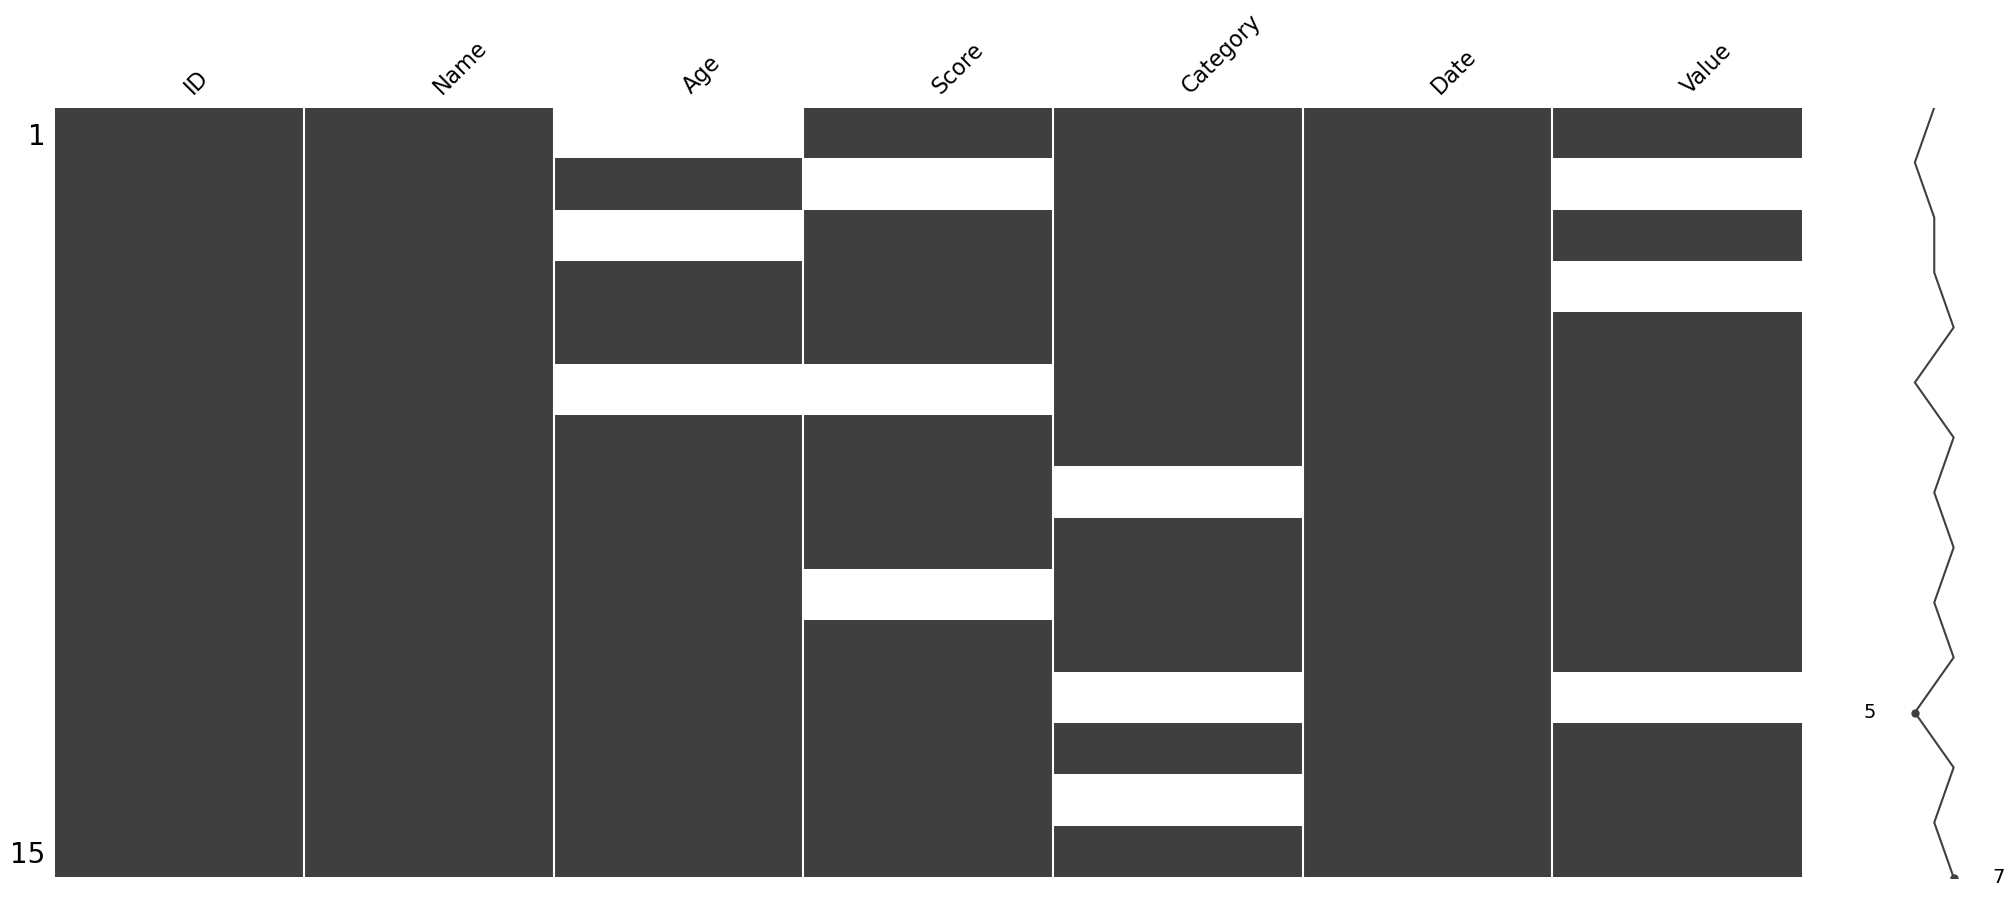

In [40]:
# !pip install missingno
# 시각화를 통한 결측치 확인
import missingno as msno
msno.matrix(df)

## Dropna
그중 결측치를 삭제하는 방법은 주로 dropna() 메서드를 사용합니다.

### 주요 파라미터
* axis=0 (기본값): 행 기준 삭제
* axis=1: 열 기준 삭제

In [41]:
# 결측치가 하나라도 있는 행 삭제
df.dropna()

,ID,Name,Age,Score,Category,Date,Value
4,5,Eva,40.0,18.182497,X,2025-01-05,-1.021552
6,7,Grace,38.0,30.424224,X,2025-01-07,-0.533649
8,9,Ivy,30.0,43.194502,Z,2025-01-09,-0.229450
10,11,Karen,43.0,61.185289,X,2025-01-11,-1.265119
12,13,Monica,59.0,29.214465,Y,2025-01-13,2.778313
14,15,Oscar,22.0,45.606998,Y,2025-01-15,0.218638


In [42]:
# 결측치가 하나라도 있는 열 삭제
df.dropna(axis=1)

,ID,Name,Date
0,1,Alice,2025-01-01
1,2,Bob,2025-01-02
2,3,Charlie,2025-01-03
3,4,David,2025-01-04
4,5,Eva,2025-01-05
5,6,Frank,2025-01-06
6,7,Grace,2025-01-07
7,8,Helen,2025-01-08
8,9,Ivy,2025-01-09
9,10,Jack,2025-01-10


* how='any' (기본값): 행 또는 열에 하나라도 결측치가 있으면 삭제
* how='all': 행 또는 열의 모든 값이 결측치일 때만 삭제

In [43]:
df.dropna(how='all', axis = 0)

,ID,Name,Age,Score,Category,Date,Value
0,1,Alice,NaN,2.058449,Z,2025-01-01,-0.600254
1,2,Bob,48.0,NaN,Y,2025-01-02,NaN
2,3,Charlie,NaN,83.244264,Z,2025-01-03,0.291034
3,4,David,27.0,21.233911,Z,2025-01-04,NaN
4,5,Eva,40.0,18.182497,X,2025-01-05,-1.021552
5,6,Frank,NaN,NaN,Z,2025-01-06,-0.161755
6,7,Grace,38.0,30.424224,X,2025-01-07,-0.533649
7,8,Helen,42.0,52.475643,NaN,2025-01-08,-0.005528
8,9,Ivy,30.0,43.194502,Z,2025-01-09,-0.229450
9,10,Jack,30.0,NaN,X,2025-01-10,0.389349


In [44]:
df.dropna(how='any', axis = 0)

,ID,Name,Age,Score,Category,Date,Value
4,5,Eva,40.0,18.182497,X,2025-01-05,-1.021552
6,7,Grace,38.0,30.424224,X,2025-01-07,-0.533649
8,9,Ivy,30.0,43.194502,Z,2025-01-09,-0.229450
10,11,Karen,43.0,61.185289,X,2025-01-11,-1.265119
12,13,Monica,59.0,29.214465,Y,2025-01-13,2.778313
14,15,Oscar,22.0,45.606998,Y,2025-01-15,0.218638


* thresh=n: 행 또는 열에서 최소 n개의 결측치가 아닌(non-NA) 값이 있어야 삭제되지 않습니다.
즉, n보다 적은 유효한 값이 있을 경우 삭제됩니다.

In [45]:
# 각 행에 최소 2개의 결측치가 아닌 값이 있어야 유지
df.dropna(thresh=2)

,ID,Name,Age,Score,Category,Date,Value
0,1,Alice,NaN,2.058449,Z,2025-01-01,-0.600254
1,2,Bob,48.0,NaN,Y,2025-01-02,NaN
2,3,Charlie,NaN,83.244264,Z,2025-01-03,0.291034
3,4,David,27.0,21.233911,Z,2025-01-04,NaN
4,5,Eva,40.0,18.182497,X,2025-01-05,-1.021552
5,6,Frank,NaN,NaN,Z,2025-01-06,-0.161755
6,7,Grace,38.0,30.424224,X,2025-01-07,-0.533649
7,8,Helen,42.0,52.475643,NaN,2025-01-08,-0.005528
8,9,Ivy,30.0,43.194502,Z,2025-01-09,-0.229450
9,10,Jack,30.0,NaN,X,2025-01-10,0.389349


* subset=[컬럼1, 컬럼2, ...]: 특정 컬럼에 대해서만 결측치 여부를 확인하여 삭제합니다.

In [46]:
# 'Age'와 'Score' 열에서 결측치가 있는 행 삭제
df.dropna(subset=['Age', 'Score'])

,ID,Name,Age,Score,Category,Date,Value
3,4,David,27.0,21.233911,Z,2025-01-04,NaN
4,5,Eva,40.0,18.182497,X,2025-01-05,-1.021552
6,7,Grace,38.0,30.424224,X,2025-01-07,-0.533649
7,8,Helen,42.0,52.475643,NaN,2025-01-08,-0.005528
8,9,Ivy,30.0,43.194502,Z,2025-01-09,-0.229450
10,11,Karen,43.0,61.185289,X,2025-01-11,-1.265119
11,12,Leo,55.0,13.949386,NaN,2025-01-12,NaN
12,13,Monica,59.0,29.214465,Y,2025-01-13,2.778313
13,14,Nina,43.0,36.636184,NaN,2025-01-14,1.193640
14,15,Oscar,22.0,45.606998,Y,2025-01-15,0.218638


## 결측치 채우는 방법
* fillna() 메서드는 결측치를 특정 값이나 통계치(평균, 중앙값 등)로 채울 때 사용합니다.

In [47]:
# 모든 결측치를 0으로 채우기
df.fillna(0)

,ID,Name,Age,Score,Category,Date,Value
0,1,Alice,0.0,2.058449,Z,2025-01-01,-0.600254
1,2,Bob,48.0,0.000000,Y,2025-01-02,0.000000
2,3,Charlie,0.0,83.244264,Z,2025-01-03,0.291034
3,4,David,27.0,21.233911,Z,2025-01-04,0.000000
4,5,Eva,40.0,18.182497,X,2025-01-05,-1.021552
5,6,Frank,0.0,0.000000,Z,2025-01-06,-0.161755
6,7,Grace,38.0,30.424224,X,2025-01-07,-0.533649
7,8,Helen,42.0,52.475643,0,2025-01-08,-0.005528
8,9,Ivy,30.0,43.194502,Z,2025-01-09,-0.229450
9,10,Jack,30.0,0.000000,X,2025-01-10,0.389349


In [48]:
# Age열의 결측치를 평균값으로 채우기
df['Age'].fillna(df['Age'].mean())

0     39.75
1     48.00
2     39.75
3     27.00
4     40.00
5     39.75
6     38.00
7     42.00
8     30.00
9     30.00
10    43.00
11    55.00
12    59.00
13    43.00
14    22.00
Name: Age, dtype: float64

In [49]:
# Score열의 결측치를 중앙값으로 채우기
df['Score'].fillna(df['Score'].median())

0      2.058449
1     33.530204
2     83.244264
3     21.233911
4     18.182497
5     33.530204
6     30.424224
7     52.475643
8     43.194502
9     33.530204
10    61.185289
11    13.949386
12    29.214465
13    36.636184
14    45.606998
Name: Score, dtype: float64

In [50]:
# Age열은 평균값으로, Score열은 0으로 채우기
mean_A = df['Age'].mean()
df.fillna({'Age': mean_A, 'Score': 0})

,ID,Name,Age,Score,Category,Date,Value
0,1,Alice,39.75,2.058449,Z,2025-01-01,-0.600254
1,2,Bob,48.00,0.000000,Y,2025-01-02,NaN
2,3,Charlie,39.75,83.244264,Z,2025-01-03,0.291034
3,4,David,27.00,21.233911,Z,2025-01-04,NaN
4,5,Eva,40.00,18.182497,X,2025-01-05,-1.021552
5,6,Frank,39.75,0.000000,Z,2025-01-06,-0.161755
6,7,Grace,38.00,30.424224,X,2025-01-07,-0.533649
7,8,Helen,42.00,52.475643,NaN,2025-01-08,-0.005528
8,9,Ivy,30.00,43.194502,Z,2025-01-09,-0.229450
9,10,Jack,30.00,0.000000,X,2025-01-10,0.389349


In [51]:
# forward fill: 이전 값으로 채우기
df.ffill()

,ID,Name,Age,Score,Category,Date,Value
0,1,Alice,NaN,2.058449,Z,2025-01-01,-0.600254
1,2,Bob,48.0,2.058449,Y,2025-01-02,-0.600254
2,3,Charlie,48.0,83.244264,Z,2025-01-03,0.291034
3,4,David,27.0,21.233911,Z,2025-01-04,0.291034
4,5,Eva,40.0,18.182497,X,2025-01-05,-1.021552
5,6,Frank,40.0,18.182497,Z,2025-01-06,-0.161755
6,7,Grace,38.0,30.424224,X,2025-01-07,-0.533649
7,8,Helen,42.0,52.475643,X,2025-01-08,-0.005528
8,9,Ivy,30.0,43.194502,Z,2025-01-09,-0.229450
9,10,Jack,30.0,43.194502,X,2025-01-10,0.389349


In [53]:
# backward fill: 이후 값으로 채우기
df.bfill()

,ID,Name,Age,Score,Category,Date,Value
0,1,Alice,48.0,2.058449,Z,2025-01-01,-0.600254
1,2,Bob,48.0,83.244264,Y,2025-01-02,0.291034
2,3,Charlie,27.0,83.244264,Z,2025-01-03,0.291034
3,4,David,27.0,21.233911,Z,2025-01-04,-1.021552
4,5,Eva,40.0,18.182497,X,2025-01-05,-1.021552
5,6,Frank,38.0,30.424224,Z,2025-01-06,-0.161755
6,7,Grace,38.0,30.424224,X,2025-01-07,-0.533649
7,8,Helen,42.0,52.475643,Z,2025-01-08,-0.005528
8,9,Ivy,30.0,43.194502,Z,2025-01-09,-0.229450
9,10,Jack,30.0,61.185289,X,2025-01-10,0.389349


* interpolate(): 연속적인 수치 데이터의 경우, 선형 보간법(linear interpolation) 등을 이용해 결측치를 보간할 수 있습니다.

In [56]:
dates = ["2025-12-01", "2025-12-02", "2025-12-07", "2025-12-10"]
data = [1, np.nan, np.nan, 10]

dates = pd.to_datetime(dates)

s = pd.Series(data, index = dates)
s.interpolate()

2025-12-01     1.0
2025-12-02     4.0
2025-12-07     7.0
2025-12-10    10.0
dtype: float64

In [57]:
s.interpolate(method = 'time')

2025-12-01     1.0
2025-12-02     2.0
2025-12-07     7.0
2025-12-10    10.0
dtype: float64

## 연습문제 (결측치.csv 파일을 활용)

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("Data/결측치.csv")
df.head()

,ID,Name,Age,Score,Category,Date,Value
0,1,Alice,NaN,2.058449,Z,2025-01-01,-0.600254
1,2,Bob,48.0,NaN,Y,2025-01-02,NaN
2,3,Charlie,NaN,83.244264,Z,2025-01-03,0.291034
3,4,David,27.0,21.233911,Z,2025-01-04,NaN
4,5,Eva,40.0,18.182497,X,2025-01-05,-1.021552


1. 데이터프레임의 각 열에 몇 개의 결측치가 있는지 출력하시오.

In [5]:
df.isnull().sum()

ID          0
Name        0
Age         3
Score       3
Category    3
Date        0
Value       3
dtype: int64

2. 데이터프레임 전체에 존재하는 결측치의 총 개수를 출력하시오.

In [7]:
df.isnull().sum().sum()

12

3. 'Score' 열에 결측치가 있는 행들의 'ID'와 'Name' 열만 출력하시오.

In [43]:
[df.isnull()]['ID','Name']

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_117708\647379969.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [df.isnull()]['ID','Name']
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_117708\647379969.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [df.isnull()]['ID','Name']
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_117708\647379969.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [df.isnull()]['ID','Name']
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_117708\647379969.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [df.isnull()]['ID','Name']
C:\Users\c

TypeError: list indices must be integers or slices, not tuple

4. 결측치가 하나라도 포함된 행을 삭제한 후 남은 데이터프레임의 행과 열의 수(Shape)를 출력하시오.

In [42]:
df.dropna().shape

(6, 7)

5. 결측치가 하나라도 포함된 열을 삭제한 후 남은 열의 이름들을 출력하시오.

In [44]:
df.dropna(axis = 1).columns

Index(['ID', 'Name', 'Date'], dtype='object')

6. 'Age' 열의 결측치를 해당 열의 평균값으로 대체하고, 대체 후 'Age' 열의 평균과 중앙값을 출력하여 정상적으로 대체되었는지 확인하시오.

In [46]:
A = df['Age'].fillna(df['Age'].mean())
A, A.mean(), A.median()

(0     39.75
 1     48.00
 2     39.75
 3     27.00
 4     40.00
 5     39.75
 6     38.00
 7     42.00
 8     30.00
 9     30.00
 10    43.00
 11    55.00
 12    59.00
 13    43.00
 14    22.00
 Name: Age, dtype: float64,
 39.75,
 39.75)

7. 'Score' 열의 결측치를 0으로 대체한 후, 변경된 'Score' 열을 출력하시오.

In [22]:
df['Score'].fillna(0)

0      2.058449
1      0.000000
2     83.244264
3     21.233911
4     18.182497
5      0.000000
6     30.424224
7     52.475643
8     43.194502
9      0.000000
10    61.185289
11    13.949386
12    29.214465
13    36.636184
14    45.606998
Name: Score, dtype: float64

8. 'Category'와 'Value' 열에 결측치가 있는 행을 삭제한 새로운 데이터프레임을 생성하고 출력하시오.

In [26]:
df.dropna(subset = ["Category", "Value"]) 

,ID,Name,Age,Score,Category,Date,Value
0,1,Alice,NaN,2.058449,Z,2025-01-01,-0.600254
2,3,Charlie,NaN,83.244264,Z,2025-01-03,0.291034
4,5,Eva,40.0,18.182497,X,2025-01-05,-1.021552
5,6,Frank,NaN,NaN,Z,2025-01-06,-0.161755
6,7,Grace,38.0,30.424224,X,2025-01-07,-0.533649
8,9,Ivy,30.0,43.194502,Z,2025-01-09,-0.229450
9,10,Jack,30.0,NaN,X,2025-01-10,0.389349
10,11,Karen,43.0,61.185289,X,2025-01-11,-1.265119
12,13,Monica,59.0,29.214465,Y,2025-01-13,2.778313
14,15,Oscar,22.0,45.606998,Y,2025-01-15,0.218638


9. 각 열에 대해 결측치의 비율(결측치 개수 / 전체 행의 수)을 계산하여 출력하시오.

In [48]:
df.isnull().sum()  / len(df)

ID          0.0
Name        0.0
Age         0.2
Score       0.2
Category    0.2
Date        0.0
Value       0.2
dtype: float64

10. 나이가 30 이상인 행들 중에서 결측치가 없는 행들만 선택한 후, 이 데이터에서 'Score'의 평균값을 구하시오.

In [50]:
A = df[df['Age']>=30].dropna()
A['Score'].mean()

36.44019544132703